In [113]:
import sys
sys.path.append("..")
import util

import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

import seaborn as sns

_PROJECTION = ccrs.Mercator.GOOGLE

## Phytoplankton Data Summary Plots

In [26]:
isolates = pd.read_csv(
    "../../data/Phytoplankton_temperature_growth_rate_dataset_2016_01_29/traits_derived_2016_01_29.csv",
    engine='python'
)

In [27]:
len(isolates)

474

In [28]:
isolates.groupby('habitat').count().iloc[:, 0]

habitat
estuarine       43
freshwater     214
hot spring       2
marine         206
saline lake      6
salt marsh       1
unknown          2
Name: isolate.code, dtype: int64

In [170]:
isolates = isolates[
    (isolates.habitat == 'marine') &
    (isolates.curvequal == 'good')
].dropna(subset=['isolation.latitude', 'isolation.longitude'])

In [171]:
print(f"Num Isolates: {len(isolates)}")

Num Isolates: 89


## Plot by Order

In [172]:
isolates.group = isolates.group.str.title()

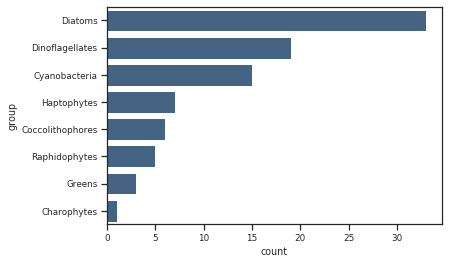

In [173]:

sns.countplot(y='group', data=isolates, order=isolates.group.value_counts().sort_values(ascending=False).index, color='xkcd:denim')

## Add Map

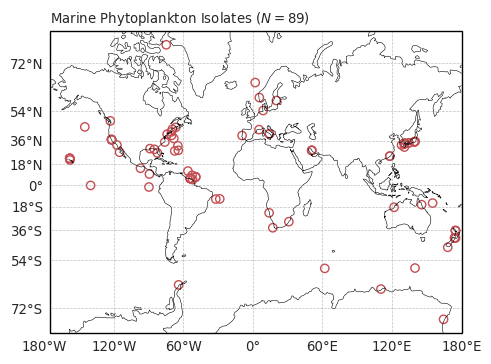

In [174]:
fig = plt.figure(dpi=100)
ax = plt.axes(projection=_PROJECTION)
ax.scatter(
    isolates['isolation.longitude'],
    isolates['isolation.latitude'],
    transform = ccrs.PlateCarree(), 
    facecolor='none', edgecolors='r'
)
ax.add_feature(cf.COASTLINE, linewidth=0.4)
util.add_gridlines(ax)

plt.title(f"Marine Phytoplankton Isolates ($N = {len(isolates)}$)", loc='left');
# plt.savefig("figures/marine_phyto_isolates.png", dpi=300, bbox_inches='tight')

## Combine

In [175]:
groups = isolates.group.unique()
group_colors = sns.color_palette('bright', n_colors = len(groups))
group_colormap = {g:c for g,c in zip(groups, group_colors)}

In [181]:
isolates['color'] = isolates.group.apply(lambda x: group_colormap[x])


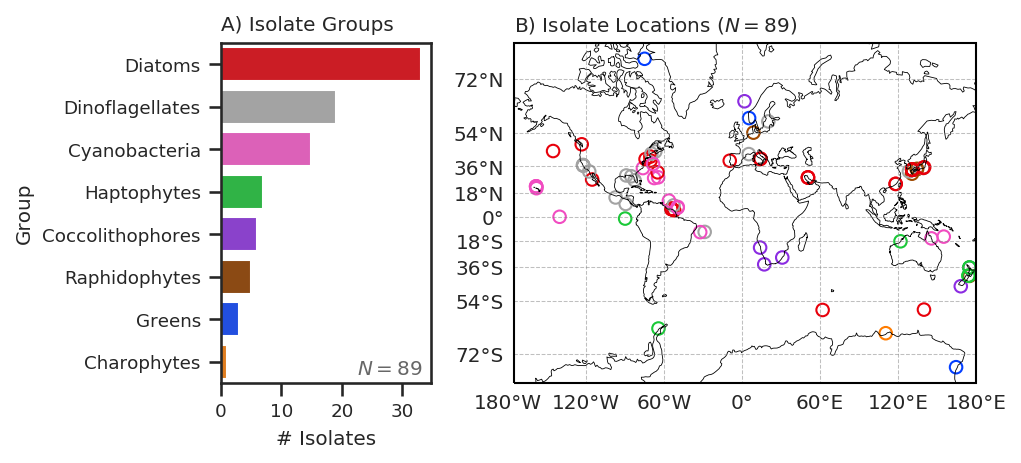

In [193]:
sns.set(font_scale=0.8, style='ticks')
sns.set_palette('bright')
fig = plt.figure(figsize=(6.5,3), dpi=150)
gs = fig.add_gridspec(1, 2, width_ratios=[1,2.2], wspace=0.25)

bar_ax = fig.add_subplot(gs[0])
sns.countplot(y='group', data=isolates, order=isolates.group.value_counts().sort_values(ascending=False).index, ax=bar_ax, palette=group_colormap)
bar_ax.set_title("A) Isolate Groups", loc='left')
bar_ax.set_ylabel("Group")
bar_ax.set_xlabel("# Isolates")
bar_ax.set_xticks([0, 10, 20, 30])

bar_ax.annotate("$N = " + f"{len(isolates)}$", (0.96, 0.04), xycoords='axes fraction', ha='right', va='center', alpha=0.7)


map_ax = fig.add_subplot(gs[1], projection=_PROJECTION)

map_ax.scatter(
    isolates['isolation.longitude'],
    isolates['isolation.latitude'],
    transform = ccrs.PlateCarree(), 
    facecolor='none', edgecolors=isolates['color']
)
map_ax.add_feature(cf.COASTLINE, linewidth=0.4)
map_ax.set_ylabel("Latitude [deg]")


util.add_gridlines(map_ax)

# plt.tight_layout(h_pad=16)
map_ax.set_title(f"B) Isolate Locations ($N = {len(isolates)}$)", loc='left');
# plr
plt.savefig("marine_phyto_isolates_group_map.png", dpi=300, bbox_inches='tight')

## Some Useful Statistics

In [213]:
print(isolates['isolation.latitude'].min())
print(isolates['isolation.latitude'].max())

-74.83
76.28


In [199]:
# genera
print(len(isolates.genus.unique()))

41


In [201]:
genus_species = isolates.genus + isolates.species

In [210]:
# species
print(len(genus_species.dropna().unique()))

48


In [212]:
isolates.groupby(genus_species).count()l

,isolate.code,source,isolation.latitude,isolation.longitude,habitat,name,speciesname,former.name.1,former.name.2,strain,...,maxqual,curvequal,abs.curveskew,rel.curveskew,used.for.optimum.analysis,used.for.tmax.analysis,used.for.tmin.analysis,used.for.niche.width.analysis,used.for.max.growth.rate.analysis,color
Akashiwosanguinea,2,2,2,2,2,2,2,1,1,1,...,2,2,2,2,2,2,2,2,2,2
Alexandriumfundyense,2,2,2,2,2,2,2,0,0,2,...,2,2,2,2,2,2,2,2,2,2
Alexandriummonilatum,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Biceratiumfurca,1,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
Calcidiscusleptoporus,2,2,2,2,2,2,2,0,0,2,...,2,2,2,2,2,2,2,2,2,2
Chaetocerosdidymus,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Chaetoceroslorenzianus,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Chaetocerospseudocurvisetus,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Chattonellamarina,2,2,2,2,2,2,2,1,0,1,...,2,2,2,2,2,2,2,2,2,2
Chryosochromulinaacantha,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
